# Employee Attrition


### Data set used in this analysis
<p>HR dataset named ‘IBM HR Analytics Employee Attrition & Performance’ </p>


### Importing libraries for data handling and analysis


In [1]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

### Importing libraries for data visualisations


In [4]:
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None

### Explain the functionalities of the above libraries below. Use bullet point list

TODO













## Loading the dataset

In [5]:
import zipfile
 
# open zipped dataset
with zipfile.ZipFile("attrition.zip") as z:
   # open the csv file in the dataset
   with z.open("WA_Fn-UseC_-HR-Employee-Attrition.csv") as f:
       
      # read the dataset
      attrition = pd.read_csv(f)
       
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Information on the dataset can be found here:

http://inseaddataanalytics.github.io/INSEADAnalytics/groupprojects/January2018FBL/IBM_Attrition_VSS.html

In [6]:
#Exploring and understanding the dataset
# Write code below
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Describe what the dataset contains









In [7]:
attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Data Cleaning and Transformation

In [8]:
#checking for duplicate row entries in the data
# Write code below
duplicate_rows = attrition.duplicated()
duplicate_rows

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

In [9]:
#Computing number of unique values in the fields (columns) of the dataset
# Write code below
att = attrition.nunique()
att

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [10]:
#Checking for redundant columns
# Write code below

def getDuplicateColumns(df):
 
    #create an empty set
    duplicateColumnNames = set()
 
    #iterate through all the columns of dataframe
    for x in range(attrition.shape[1]):
 
        #take column at xth index.
        col = attrition.iloc[:, x]
 
        #iterate through all the columns
        for y in range(x + 1, attrition.shape[1]):
 
            #take column at yth index.
            otherCol = attrition.iloc[:, y]
 
            #check if two columns at x & y
            if col.equals(otherCol):
                duplicateColumnNames.add(attrition.columns.values[y])
 
    return list(duplicateColumnNames)

#get list of duplicate columns
duplicateNames = getDuplicateColumns(attrition)
print("Duplicate Columns:", duplicateNames)

Duplicate Columns: []


In [11]:
#Removing redundant columns
# Write code below
attri=attrition.drop(columns=duplicateNames)

For conversion to Categorical type, we only want to use non-numeric columns

In [12]:
#For "dirtier" version of the dataset, this would have been needed
#attrition['MaritalStatus']= attrition['MaritalStatus'].replace('Divorcedddd','Divorced')
#attrition['MaritalStatus']= attrition['MaritalStatus'].replace('Divorceddd','Divorced')

In [13]:
#Checking for columns to convert to Categorical
# Explore each column to determine if it should be categorical
for column in attrition.columns:
    unique_values = attrition[column].nunique()
    data_type = attrition[column].dtype
    
    # Print columns with fewer than 10 unique values or are of object type
    if unique_values < 10 or data_type == 'object':
        print(f'Column: {column}')
        print(f'  Unique Values: {unique_values}')
        print(f'  Data Type: {data_type}\n')

Column: Attrition
  Unique Values: 2
  Data Type: object

Column: BusinessTravel
  Unique Values: 3
  Data Type: object

Column: Department
  Unique Values: 3
  Data Type: object

Column: Education
  Unique Values: 5
  Data Type: int64

Column: EducationField
  Unique Values: 6
  Data Type: object

Column: EmployeeCount
  Unique Values: 1
  Data Type: int64

Column: EnvironmentSatisfaction
  Unique Values: 4
  Data Type: int64

Column: Gender
  Unique Values: 2
  Data Type: object

Column: JobInvolvement
  Unique Values: 4
  Data Type: int64

Column: JobLevel
  Unique Values: 5
  Data Type: int64

Column: JobRole
  Unique Values: 9
  Data Type: object

Column: JobSatisfaction
  Unique Values: 4
  Data Type: int64

Column: MaritalStatus
  Unique Values: 3
  Data Type: object

Column: Over18
  Unique Values: 1
  Data Type: object

Column: OverTime
  Unique Values: 2
  Data Type: object

Column: PerformanceRating
  Unique Values: 2
  Data Type: int64

Column: RelationshipSatisfaction
  Un

In [14]:
# Convert appropriate columns to categories. 
categorical_columns = [
    'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 
    'JobRole', 'MaritalStatus', 'Over18', 'OverTime'
]

#convert these columns to 'category' dtype
for column in categorical_columns:
    attrition[column] = attrition[column].astype('category')

numerical_to_categorical = [
    'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
    'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction',
    'WorkLifeBalance', 'StockOptionLevel'
]

#convert these numerical columns to 'category' dtype
for column in numerical_to_categorical:
    attrition[column] = attrition[column].astype('category')

#display the updated data types to confirm the changes
print(attrition.dtypes)

Age                            int64
Attrition                   category
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                   category
EducationField              category
EmployeeCount                  int64
EmployeeNumber                 int64
EnvironmentSatisfaction     category
Gender                      category
HourlyRate                     int64
JobInvolvement              category
JobLevel                    category
JobRole                     category
JobSatisfaction             category
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
Over18                      category
OverTime                    category
PercentSalaryHike              int64
PerformanceRating           category
RelationshipSatisfaction    category
StandardHours                  int64
S

### Exploratory Data Analysis

Analyzing outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7f27af4c22d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f27af4c3710>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f27af481c10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f27af4cc890>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f27af4cd110>],
 'means': []}

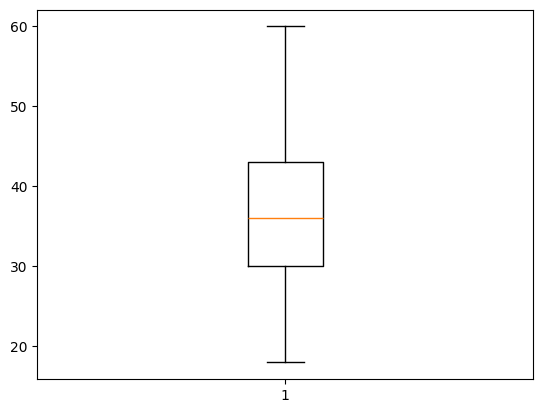

In [15]:
# Are there any outliers in the Age variable?
plt.boxplot(attrition['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f27ad1dc790>,
 'caps': [<matplotlib.lines.Line2D at 0x7f27ad1ddbd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f27ad1c0890>],
 'medians': [<matplotlib.lines.Line2D at 0x7f27ad1ded50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f27ad1df610>],
 'means': []}

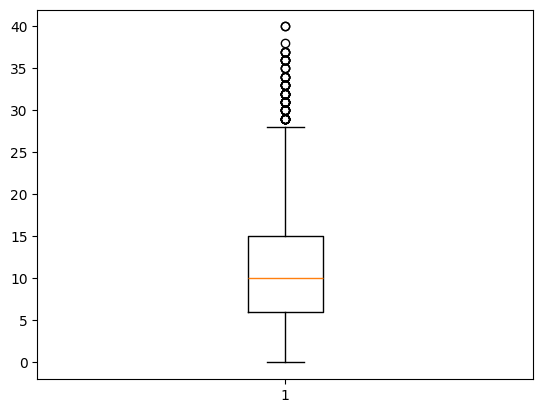

In [16]:
# Are there any outliers in the TotalWorkingYears variable?
plt.boxplot(attrition['TotalWorkingYears'])

In [17]:
# Describe the function below
def outliers(df, column):
    lower_quart=df[column].quantile(0.25)
    upper_quart=df[column].quantile(0.75)
    IQR=upper_quart-lower_quart
    threshold=1.5*IQR
    return df[df[column].between((lower_quart-threshold),(upper_quart+threshold))]

In [18]:
#Let us just keep records that are not outliers
attrition=outliers(attrition,'TotalWorkingYears')

In [19]:
attrition.shape

(1407, 35)

In [20]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1407 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1407 non-null   int64   
 1   Attrition                 1407 non-null   category
 2   BusinessTravel            1407 non-null   category
 3   DailyRate                 1407 non-null   int64   
 4   Department                1407 non-null   category
 5   DistanceFromHome          1407 non-null   int64   
 6   Education                 1407 non-null   category
 7   EducationField            1407 non-null   category
 8   EmployeeCount             1407 non-null   int64   
 9   EmployeeNumber            1407 non-null   int64   
 10  EnvironmentSatisfaction   1407 non-null   category
 11  Gender                    1407 non-null   category
 12  HourlyRate                1407 non-null   int64   
 13  JobInvolvement            1407 non-null   category
 1

In [21]:
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


#### Correlation Matrix

In [22]:
numeric_columns = attrition.select_dtypes(include=[np.number])
x=numeric_columns.corr()
x

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.018769,0.004966,NaN,-0.006045,0.035788,0.410650,0.001010,0.298087,0.006306,NaN,0.610507,-0.000696,0.235085,0.174964,0.171850,0.164593
DailyRate,0.018769,1.000000,0.001778,NaN,-0.047125,0.025610,0.010678,-0.025330,0.040860,0.022993,NaN,0.029560,0.004082,-0.010847,0.025502,-0.019613,-0.018639
DistanceFromHome,0.004966,0.001778,1.000000,NaN,0.028848,0.023447,-0.006306,0.028741,-0.024094,0.034935,NaN,0.017698,-0.036382,0.010293,0.017340,0.013521,0.014127
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.006045,-0.047125,0.028848,NaN,1.000000,0.034892,-0.013000,0.009319,-0.002509,-0.023162,NaN,-0.009506,0.027472,0.007855,-0.006584,-0.007625,-0.007366
HourlyRate,0.035788,0.025610,0.023447,NaN,0.034892,1.000000,-0.012923,-0.009930,0.030536,-0.011288,NaN,0.009928,-0.010926,-0.020660,-0.023486,-0.030585,-0.015453
MonthlyIncome,0.410650,0.010678,-0.006306,NaN,-0.013000,-0.012923,1.000000,0.015024,0.136537,-0.036493,NaN,0.730199,-0.010545,0.482090,0.349469,0.315711,0.320015
MonthlyRate,0.001010,-0.025330,0.028741,NaN,0.009319,-0.009930,0.015024,1.000000,0.013314,-0.007142,NaN,-0.016795,0.017085,-0.048827,-0.025377,-0.002487,-0.044275
NumCompaniesWorked,0.298087,0.040860,-0.024094,NaN,-0.002509,0.030536,0.136537,0.013314,1.000000,-0.013243,NaN,0.247368,-0.053722,-0.120155,-0.099548,-0.046784,-0.114915
PercentSalaryHike,0.006306,0.022993,0.034935,NaN,-0.023162,-0.011288,-0.036493,-0.007142,-0.013243,1.000000,NaN,-0.023556,-0.013087,-0.023346,-0.001147,-0.016777,-0.009248


Text(0.5, 1.0, 'Heatmap Correlation between the Input features')

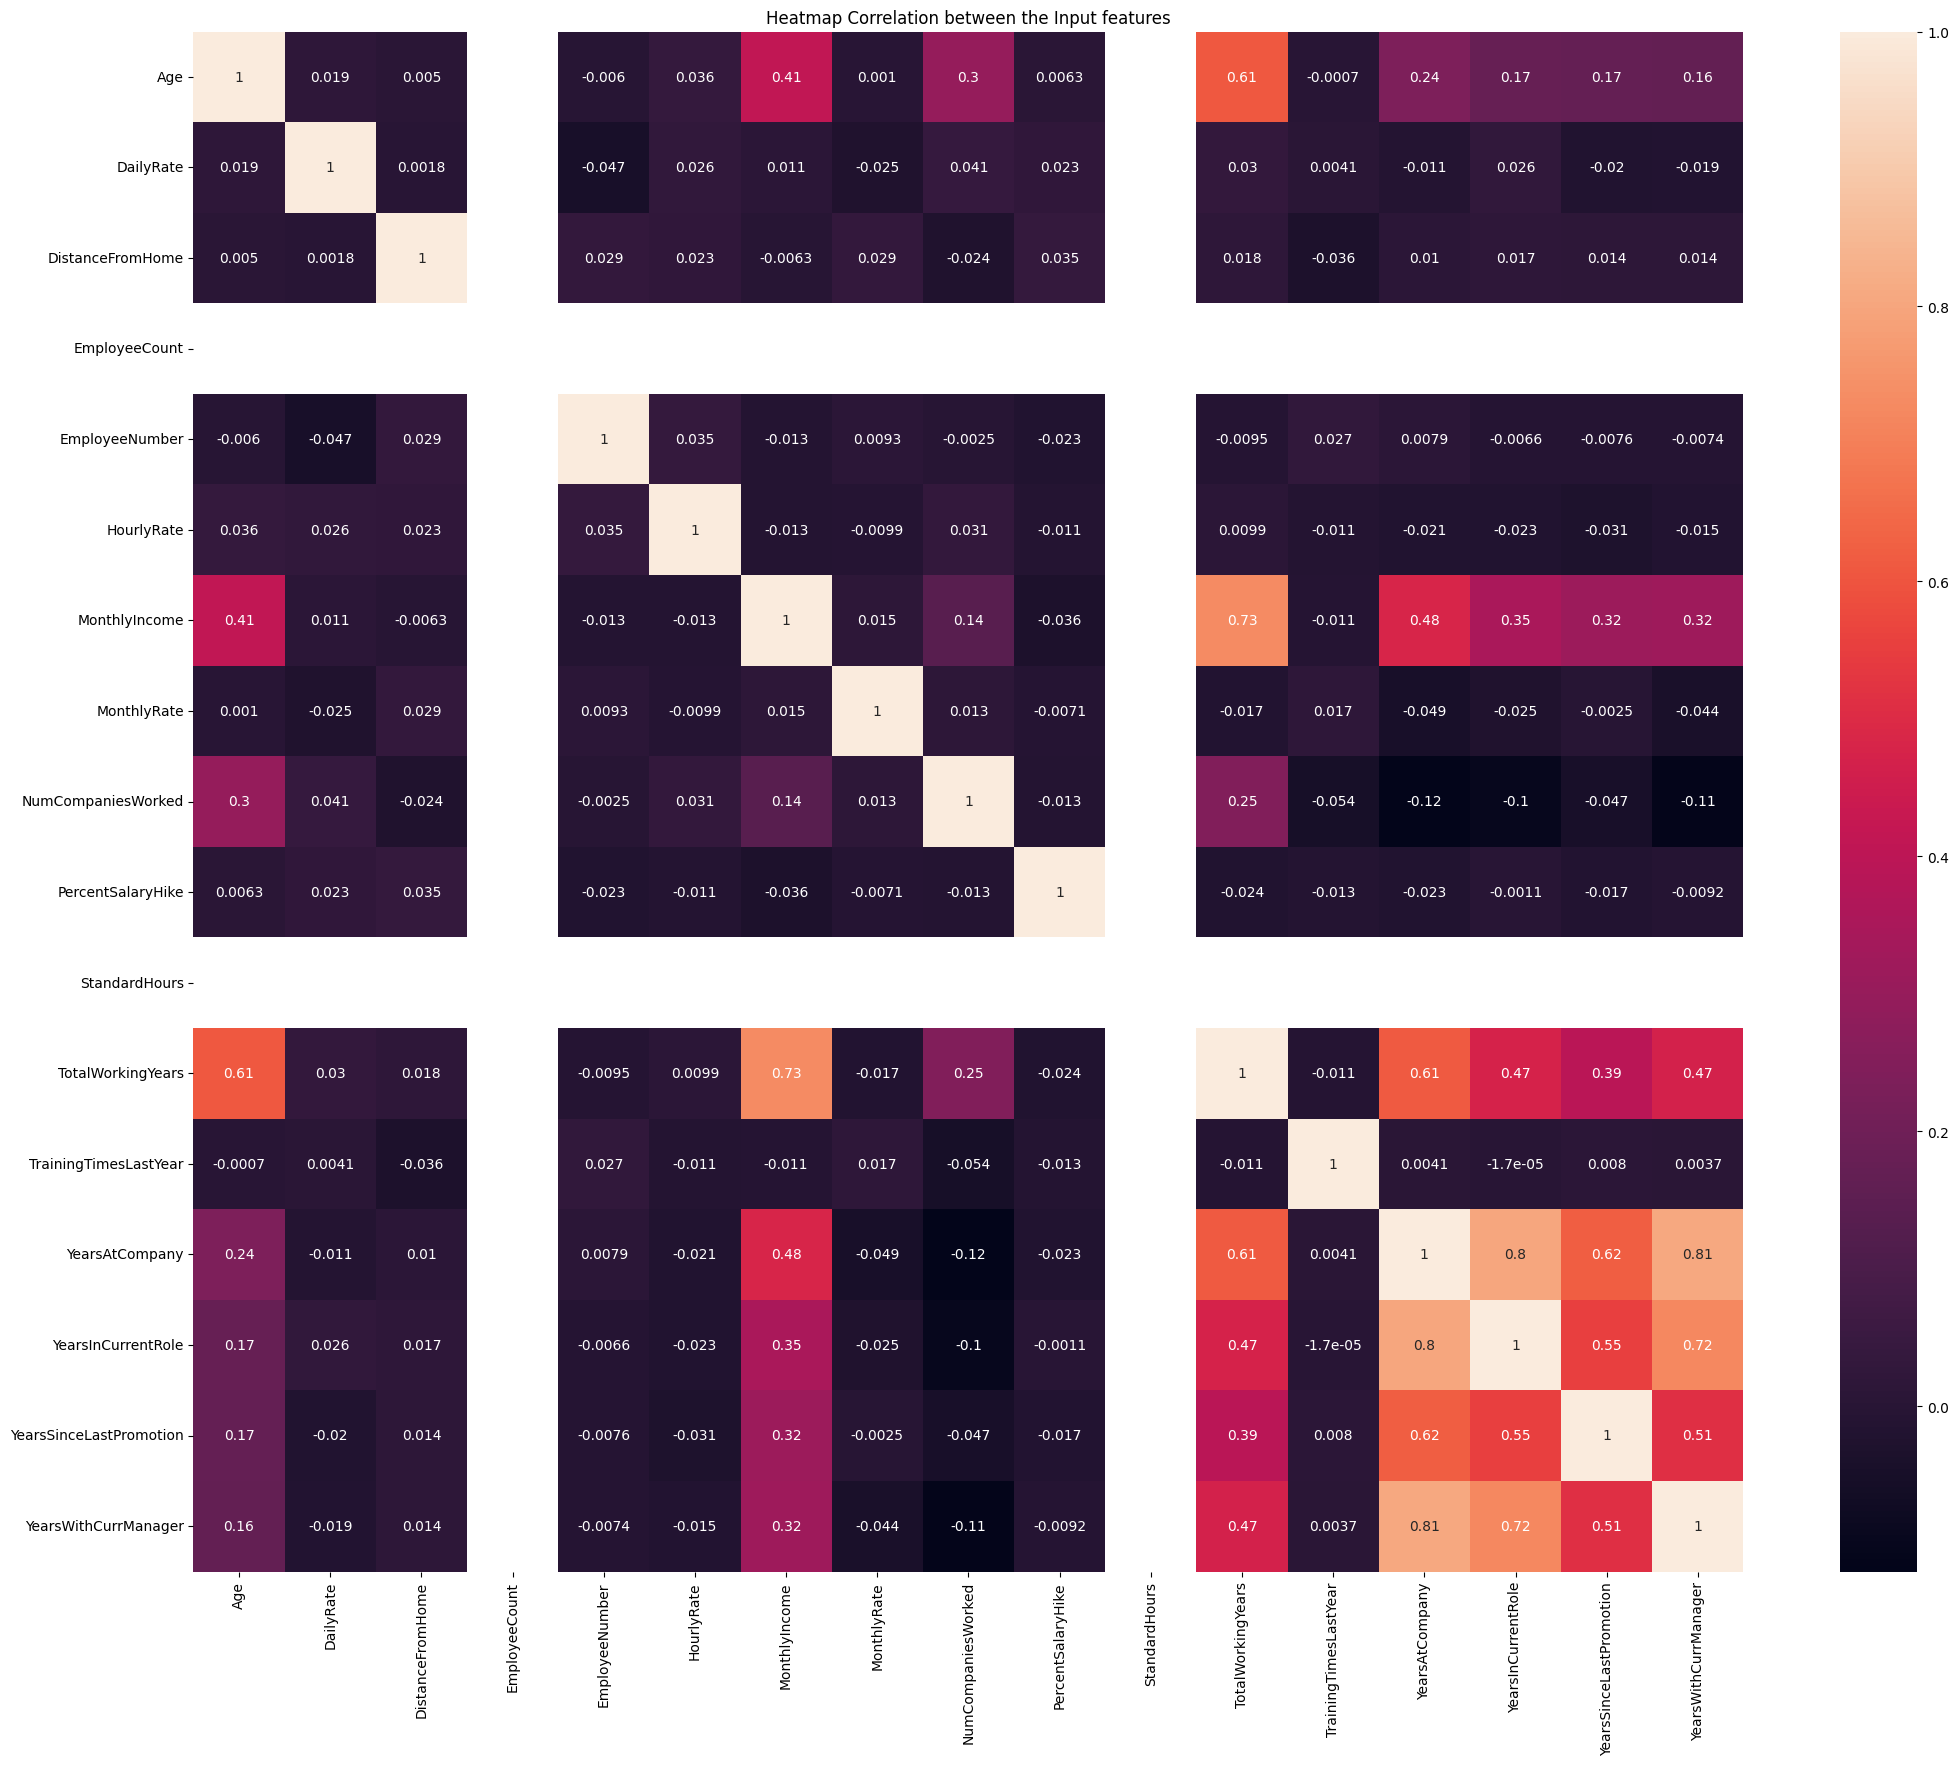

In [23]:
plt.figure(figsize=(25,20))
sns.heatmap(numeric_columns.corr(), annot=True) # Correlation between the Columns to find the highly correlated columns to remove multi-collinearity
plt.title('Heatmap Correlation between the Input features')

##### Provide Insights for correlation matrix:

We'll consider high correlations (i.e., between 0.7 and 1 for direct correlation and from −1 to −0.7 for inverse correlation): 

Explain findings


## Data Analysis

### Department with highest attrition rates

In [48]:
df=attrition['Attrition'].groupby(attrition['Department']).value_counts(normalize=False)
df

/tmp/ipykernel_743/2983741563.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df=attrition['Attrition'].groupby(attrition['Department']).value_counts(normalize=False)


Department              Attrition
Human Resources         No            46
                        Yes           12
Research & Development  No           791
                        Yes          129
Sales                   No           338
                        Yes           91
Name: count, dtype: int64

In [49]:
df=df.reset_index()
df

,Department,Attrition,count
0,Human Resources,No,46
1,Human Resources,Yes,12
2,Research & Development,No,791
3,Research & Development,Yes,129
4,Sales,No,338
5,Sales,Yes,91


In [50]:
#Need to rename columns so that the values are correctly interpreted
df=df.rename(columns={"Attrition":"Count of Employees","level_1":"Attrition"})
df

,Department,Count of Employees,count
0,Human Resources,No,46
1,Human Resources,Yes,12
2,Research & Development,No,791
3,Research & Development,Yes,129
4,Sales,No,338
5,Sales,Yes,91


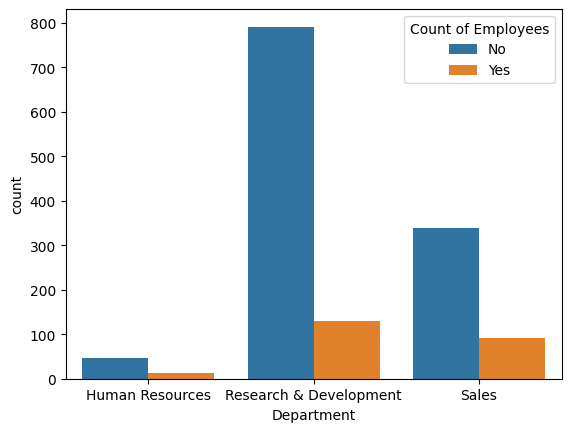

In [51]:
sns.barplot(x="Department", y="count", hue="Count of Employees", data=df)
plt.show()

/tmp/ipykernel_743/3636461640.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df=attrition['Attrition'].groupby(attrition['Department']).value_counts(normalize=True).reset_index()


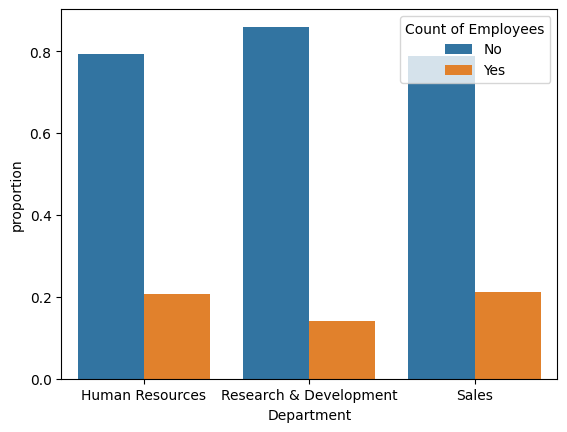

In [52]:
# Looking at the values from a proportions perspective
df=attrition['Attrition'].groupby(attrition['Department']).value_counts(normalize=True).reset_index()
df=df.rename(columns={"Attrition":"Count of Employees","level_1":"Attrition"})
sns.barplot(x="Department", y="proportion", hue="Count of Employees", data=df)
plt.show()

Text(0.5, 1.0, 'Attrition for different department employees considering their EnvironmentSatisfaction')

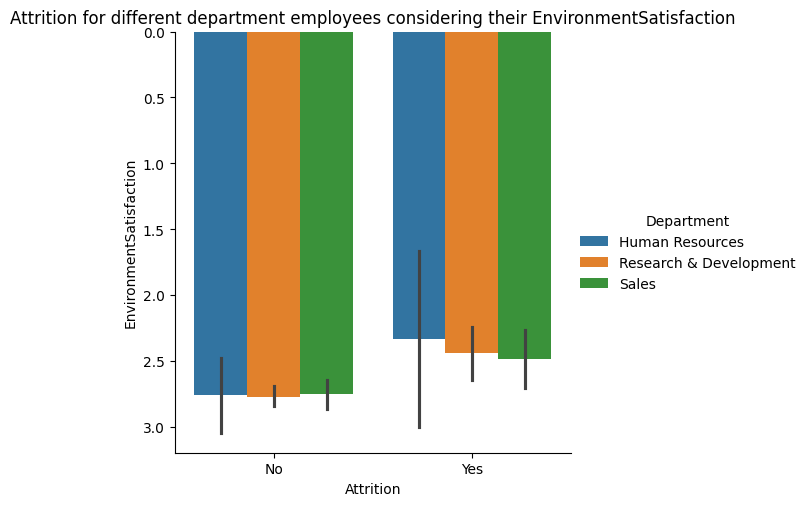

In [53]:
#Average Environment Satisfaction per Department and attrition. Error bars indicate the 95% ci values (95% ci is the default)
ax = sns.catplot(x = 'Attrition' , hue = 'Department' , y = 'EnvironmentSatisfaction', data = attrition, kind = "bar")
plt.title('Attrition for different department employees considering their EnvironmentSatisfaction')

/tmp/ipykernel_743/158751700.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 90)` for the same effect.

  ax = sns.catplot(x = 'Attrition' , hue = 'Department' , y = 'DistanceFromHome', ci=90, data = attrition, kind = "bar")


Text(0.5, 1.0, 'Attrition for different department employees considering their Distance From Home')

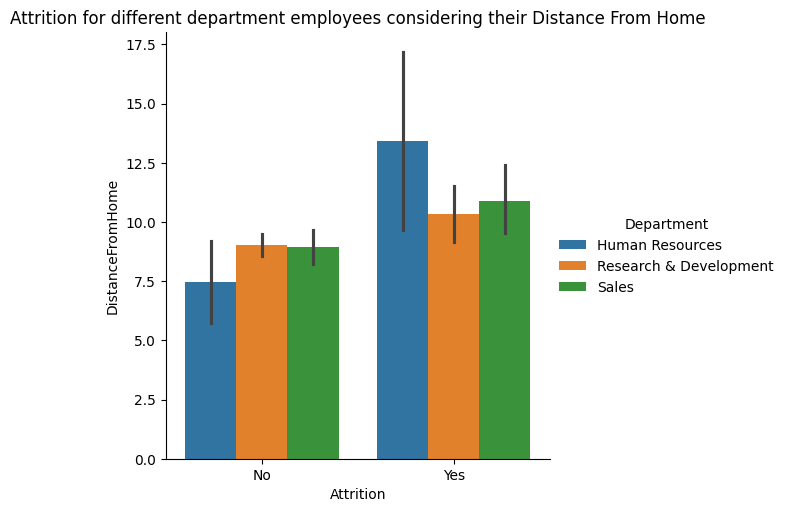

In [54]:
#Average distance from home per department and attrition. ci=90%
ax = sns.catplot(x = 'Attrition' , hue = 'Department' , y = 'DistanceFromHome', ci=90, data = attrition, kind = "bar")
plt.title('Attrition for different department employees considering their Distance From Home')

### Explain code above. What addtional analysis would you do?

 

##### What insights does this analysis provide: 

### Job Role with highest Attrition rate

In [55]:
attrition['JobRole'].unique()

['Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Sales Representative', 'Research Director', 'Manager', 'Human Resources']
Categories (9, object): ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', ..., 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative']

/tmp/ipykernel_743/1959491326.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  new_graph.set_xticklabels(labels = attrition['JobRole'].unique(), rotation=90)


Text(0.5, 1.0, 'Employees per Job Role')

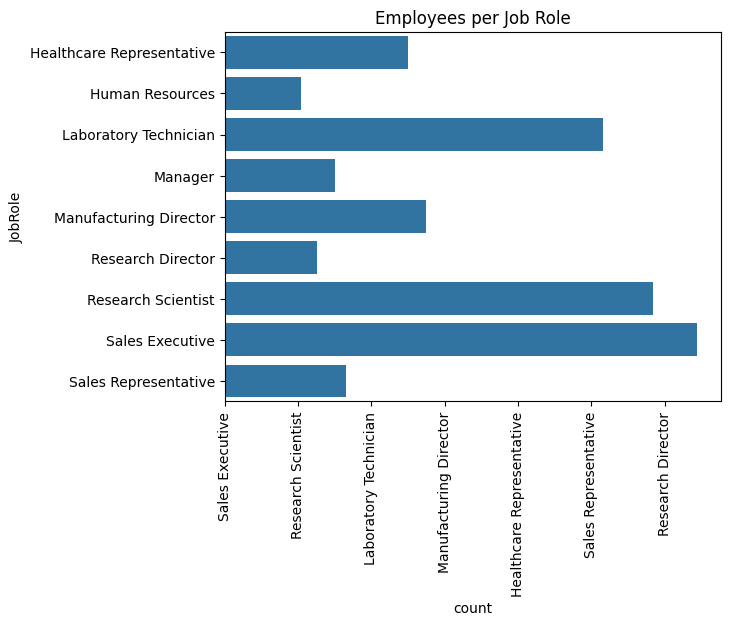

In [56]:
new_graph = sns.countplot(attrition['JobRole'])

new_graph.set_xticklabels(labels = attrition['JobRole'].unique(), rotation=90)

plt.title('Employees per Job Role')


/tmp/ipykernel_743/2331292336.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df=attrition['Attrition'].groupby(attrition['JobRole']).value_counts(normalize=False).reset_index()


Text(0.5, 1.0, 'Attrition of employees per Job Role')

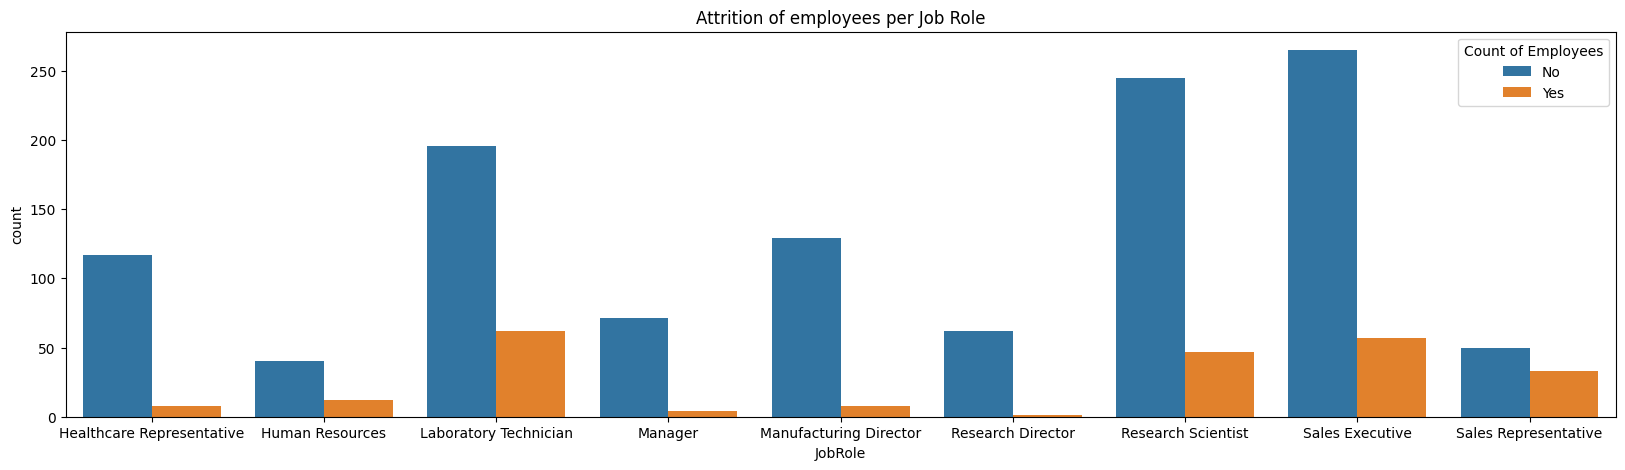

In [57]:
#Attrition per Job Role
fig=plt.subplots(figsize=(20,5))  #stretching the plot
df=attrition['Attrition'].groupby(attrition['JobRole']).value_counts(normalize=False).reset_index()
df=df.rename(columns={"Attrition":"Count of Employees","level_1":"Attrition"})
sns.barplot(x="JobRole",y="count",hue="Count of Employees",data=df)
plt.title('Attrition of employees per Job Role')

/tmp/ipykernel_743/582031299.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df=attrition['Attrition'].groupby(attrition['JobLevel']).value_counts(normalize=False).reset_index()


Text(0.5, 1.0, 'Attrition for employees of Different Job Levels')

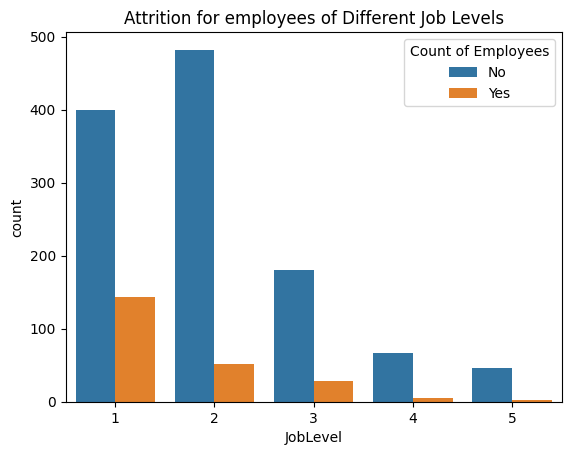

In [58]:
#Attrition per Job Level
df=attrition['Attrition'].groupby(attrition['JobLevel']).value_counts(normalize=False).reset_index()
df=df.rename(columns={"Attrition":"Count of Employees","level_1":"Attrition"})
df
sns.barplot(x="JobLevel",y="count",hue="Count of Employees",data=df)
plt.title('Attrition for employees of Different Job Levels')

/tmp/ipykernel_743/3667382030.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df=attrition['Attrition'].groupby(attrition['JobLevel']).value_counts(normalize=True).reset_index()


Text(0.5, 1.0, 'Attrition for employees of Different Job Levels - Proportions')

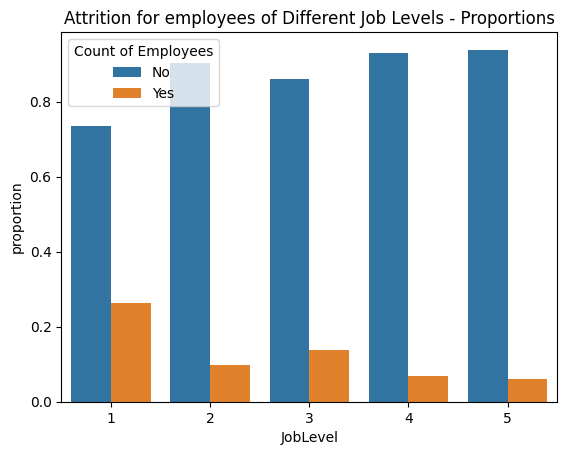

In [59]:
#Attrition per Job Level - proportions
df=attrition['Attrition'].groupby(attrition['JobLevel']).value_counts(normalize=True).reset_index()
df=df.rename(columns={"Attrition":"Count of Employees","level_1":"Attrition"})
sns.barplot(x="JobLevel",y="proportion",hue="Count of Employees",data=df)
plt.title('Attrition for employees of Different Job Levels - Proportions')

### Explain above code



##### What insights does this analysis provide:

### Effect of hourly rate of an employee on Attrition

/tmp/ipykernel_743/566877250.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(attrition['HourlyRate'], bins = 20)


Text(0.5, 1.0, 'Distribution of HourlyRate attribute')

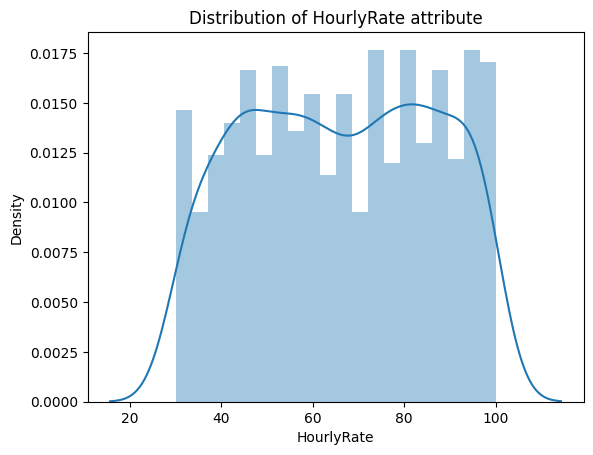

In [60]:
sns.distplot(attrition['HourlyRate'], bins = 20)
plt.title('Distribution of HourlyRate attribute')

In [61]:
# Labels to be used for creating the discrete values for the continuous valued columns 

labels = ['25-45', '45-60', '60-80', '80-110']

# Discretizing the HourlyRate into 4 discrete bins as defined below

attrition['HourlyRate'] = pd.cut(attrition['HourlyRate'], bins = [25,45,60,80,110], labels = labels)


Text(0.5, 1.0, 'Discretized HourlyRate attribute distribution')

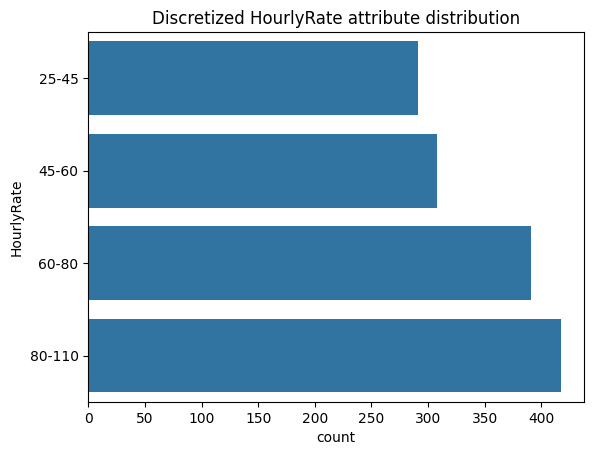

In [62]:
sns.countplot(attrition['HourlyRate'])
plt.title('Discretized HourlyRate attribute distribution')

In [63]:
#Functions to create our attrition graphs 
#Graph with employee counts
def attritiongraph(inpdata, column):
    df=inpdata['Attrition'].groupby(inpdata[column]).value_counts(normalize=False).reset_index()
    df=df.rename(columns={"Attrition":"Count of Employees","level_1":"Attrition"})
    sns.barplot(x=column,y="count",hue="Count of Employees",data=df)

#Graph with proportions of the count of employees
def attritionpropgraph(inpdata, column):
    df=inpdata['Attrition'].groupby(inpdata[column]).value_counts(normalize=True).reset_index()
    df=df.rename(columns={"Attrition":"Count of Employees","level_1":"Attrition"})
    sns.barplot(x=column,y="proportion",hue="Count of Employees",data=df)
    

/tmp/ipykernel_743/1702873499.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df=inpdata['Attrition'].groupby(inpdata[column]).value_counts(normalize=False).reset_index()


Text(0.5, 1.0, 'Attrition per HourlyRate')

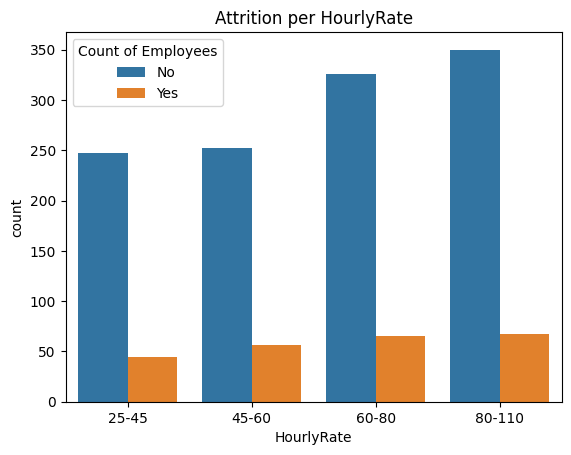

In [65]:
#Attrition per Hourly Rate
attritiongraph(attrition,'HourlyRate')
plt.title('Attrition per HourlyRate')

/tmp/ipykernel_743/1702873499.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df=inpdata['Attrition'].groupby(inpdata[column]).value_counts(normalize=True).reset_index()


Text(0.5, 1.0, 'Attrition per HourlyRate')

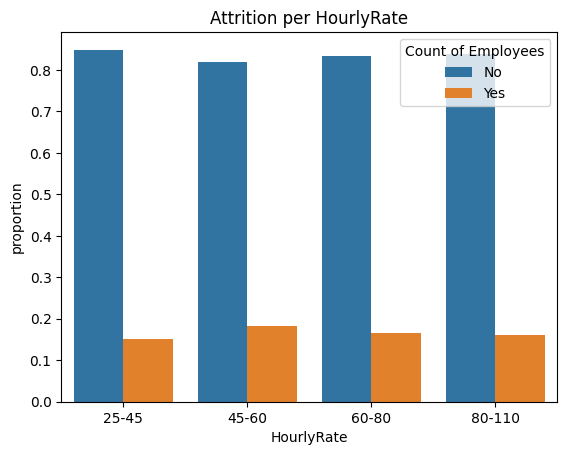

In [66]:
#Attrition per Hourly Rate - proportions
attritionpropgraph(attrition,'HourlyRate')
plt.title('Attrition per HourlyRate')

# Explain above code 


##### What insight does this analysis provide:

### Impact of Gender on Employee Attrition

Text(0, 0.5, 'Employee Count')

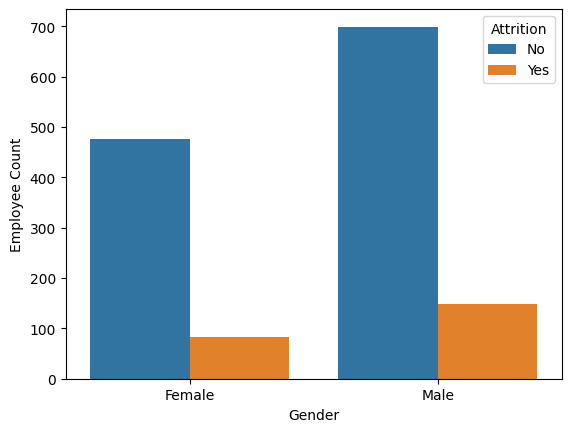

In [67]:
sns.countplot(x=attrition.Gender, hue=attrition.Attrition)  #This is a faster way of generating the graphs..
                                                            #but proportions can't be obtained this way.
plt.xlabel('Gender')
plt.ylabel('Employee Count')

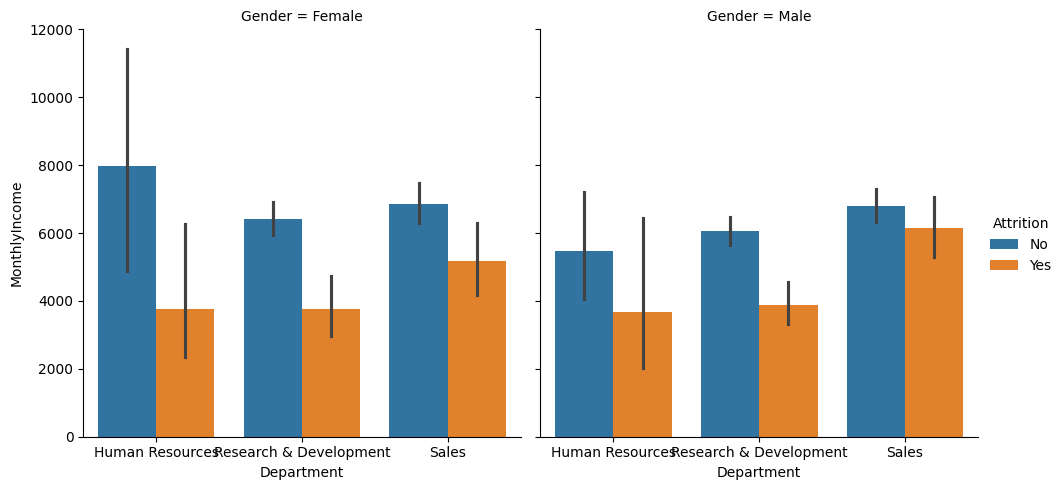

In [68]:
sns.catplot(x="Department", y="MonthlyIncome", hue="Attrition", col="Gender", kind="bar", data=attrition)

#### What insights does this analysis provide


### Education field of an Employee 

/tmp/ipykernel_743/1702873499.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df=inpdata['Attrition'].groupby(inpdata[column]).value_counts(normalize=False).reset_index()


Text(0.5, 1.0, 'Attrition per EducationField')

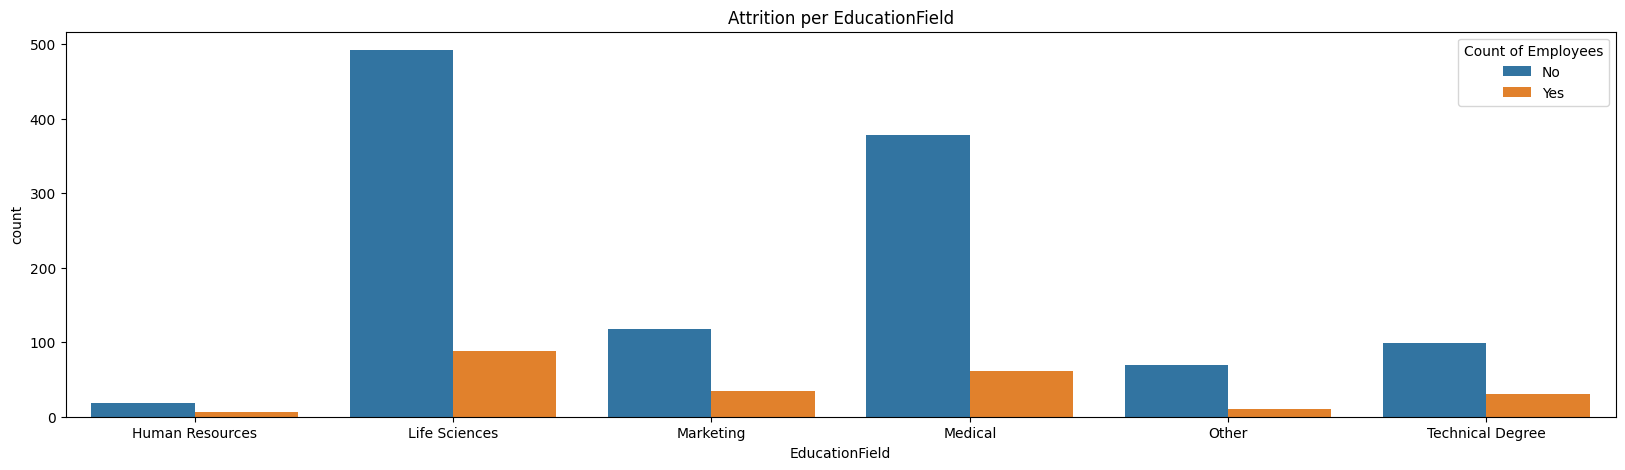

In [69]:
fig=plt.subplots(figsize=(20,5))
attritiongraph(attrition,'EducationField')
plt.title('Attrition per EducationField')

/tmp/ipykernel_743/1702873499.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df=inpdata['Attrition'].groupby(inpdata[column]).value_counts(normalize=True).reset_index()


Text(0.5, 1.0, 'Attrition per EducationField')

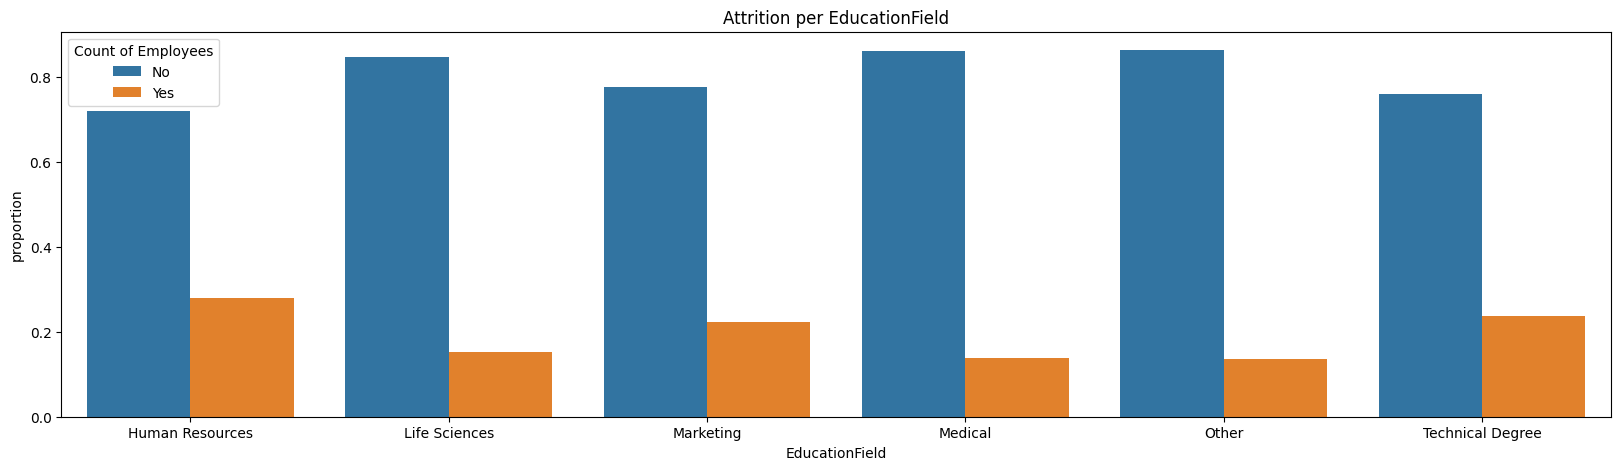

In [70]:
fig=plt.subplots(figsize=(20,5))
attritionpropgraph(attrition,'EducationField')
plt.title('Attrition per EducationField')

##### What insight does this analysis provide:

### Impact of Marital Status on employee attrition

In [71]:
attrition['MaritalStatus'].unique()


['Single', 'Married', 'Divorced']
Categories (3, object): ['Divorced', 'Married', 'Single']

Text(0.5, 1.0, 'MaritalStatus attribute distribution')

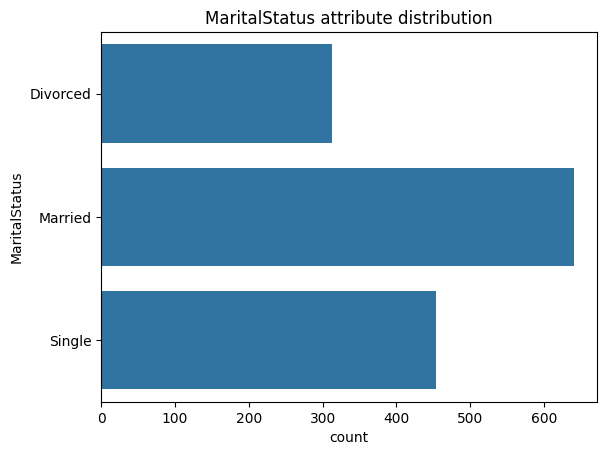

In [72]:
sns.countplot(attrition['MaritalStatus'])
plt.title('MaritalStatus attribute distribution')


/tmp/ipykernel_743/1702873499.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df=inpdata['Attrition'].groupby(inpdata[column]).value_counts(normalize=False).reset_index()


Text(0.5, 1.0, 'Attrition per MaritalStatus')

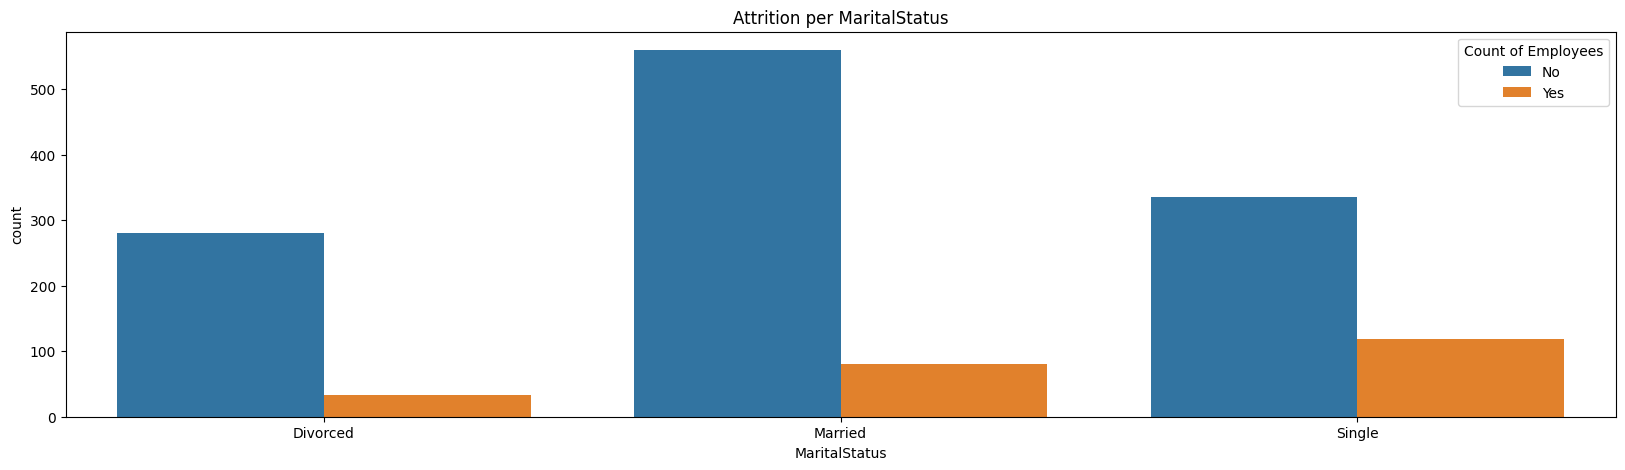

In [73]:
fig=plt.subplots(figsize=(20,5))
attritiongraph(attrition,'MaritalStatus')
plt.title('Attrition per MaritalStatus')

##### What insight does this analysis provide?

### Employee attrition based on the number of years they spent at the company

In [74]:
attrition['YearsAtCompany'].unique()

array([ 6, 10,  0,  8,  2,  7,  1,  9,  5,  4,  3, 12, 14, 22, 15, 21, 17,
       11, 13, 16, 25, 20, 24, 19, 18, 27, 26, 23])

In [75]:
# Discretizing YearsAtCompany Column values into 7  groups 
attrition['YearsAtCompany'] = pd.cut(attrition['YearsAtCompany'], bins = [0,5,10,15,20,25,30], labels = ['0-5','5-10','10-15','15-20','20-25','25-30'])

Text(0.5, 1.0, 'YearsAtCompany distribution')

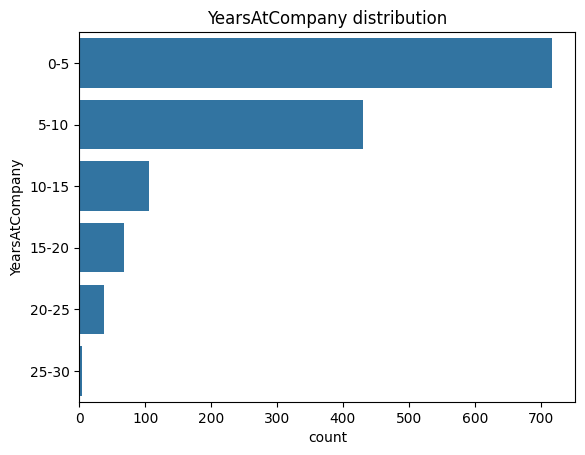

In [76]:
sns.countplot(attrition['YearsAtCompany'])
plt.title('YearsAtCompany distribution')

/tmp/ipykernel_743/1702873499.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df=inpdata['Attrition'].groupby(inpdata[column]).value_counts(normalize=False).reset_index()


Text(0.5, 1.0, 'Attrition vs. YearsAtCompany')

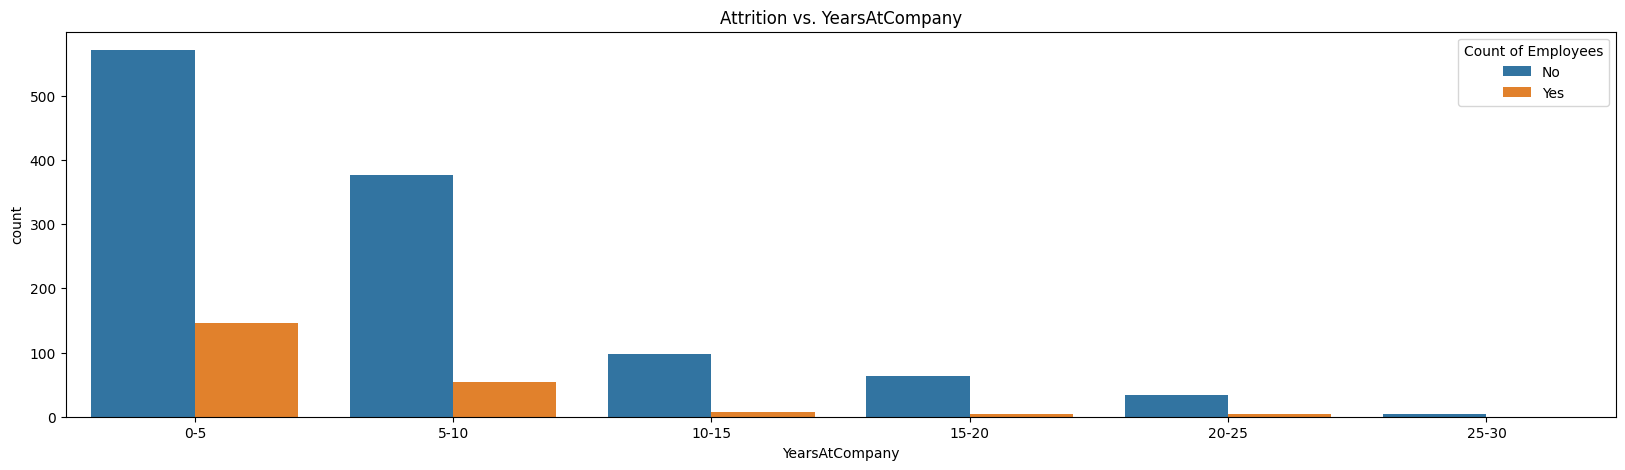

In [77]:
fig=plt.subplots(figsize=(20,5))
attritiongraph(attrition,'YearsAtCompany')
plt.title('Attrition vs. YearsAtCompany')

/tmp/ipykernel_743/1702873499.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df=inpdata['Attrition'].groupby(inpdata[column]).value_counts(normalize=True).reset_index()


Text(0.5, 1.0, 'Attrition vs. YearsAtCompany')

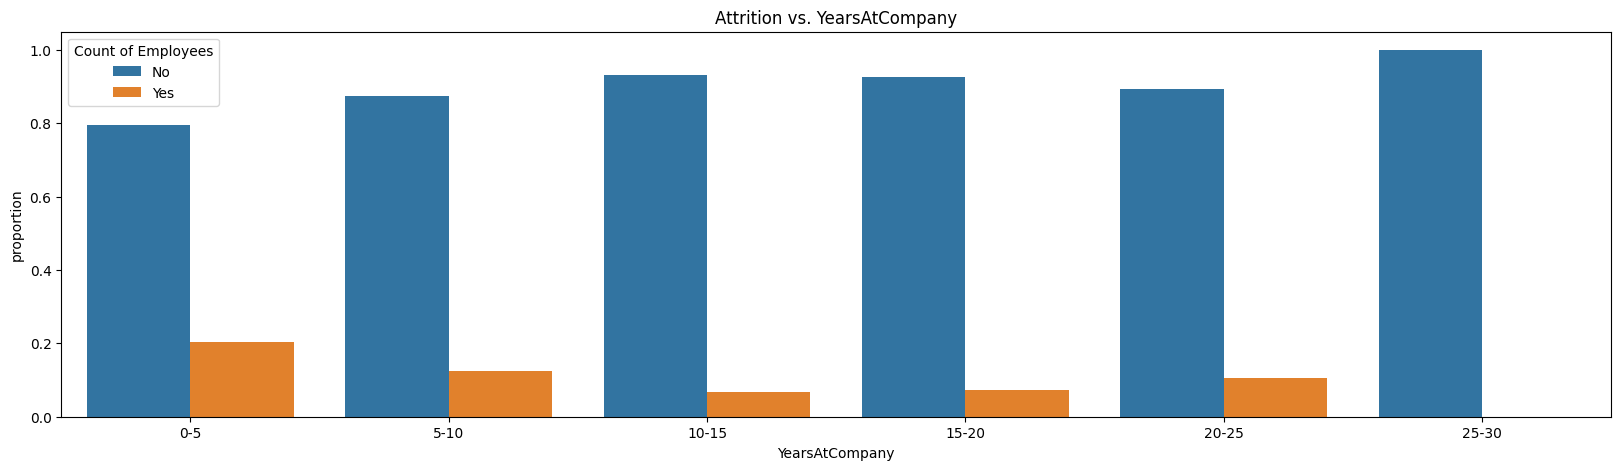

In [78]:
fig=plt.subplots(figsize=(20,5))
attritionpropgraph(attrition,'YearsAtCompany')
plt.title('Attrition vs. YearsAtCompany')

##### What insight does this analysis provide:

### Overall Conclusion 



### Describe how you will build a predictive model ?